In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import src.mnist

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [9]:
train_set, test_set, validation_set = src.mnist.get_mnist_full()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=55000, dataset="train", labels=(55000,), images=(55000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=10000, dataset="test", labels=(10000,), images=(10000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
pca1 = PCA(n_components=100)
pca1.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
train_images_pca1 = pca1.transform(train_set.images)
validation_images_pca1 = pca1.transform(validation_set.images)

In [14]:
train_counter = np.bincount(train_set.labels)
validation_counter = np.bincount(validation_set.labels)
train_images_pca1_sorted = []
validation_images_pca1_sorted = []

for i in range(0, 10):
    local_train_images_pca = np.zeros((train_counter[i], 100))
    local_validation_images_pca = np.zeros((validation_counter[i], 100))
    
    k = 0
    for j in range(0, train_set.images.shape[0]):
        if train_set.labels[j] == i:
            local_train_images_pca[k, :] = train_images_pca1[j]
            k += 1
    
    train_images_pca1_sorted.append(local_train_images_pca)
            
    k = 0
    for j in range(0, validation_set.images.shape[0]):
        if validation_set.labels[j] == i:
            local_validation_images_pca[k, :] = validation_images_pca1[j]
            k += 1
    
    validation_images_pca1_sorted.append(local_validation_images_pca)

In [15]:
gaussian_mixtures = []
for i in range(0, 10):
    gaussian_mixture = GaussianMixture(n_components=20, verbose=2)
    gaussian_mixture.fit(train_images_pca1_sorted[i])
    gaussian_mixtures.append(gaussian_mixture)

Initialization 0
  Iteration 0	 time lapse 0.54016s	 ll change inf
  Iteration 10	 time lapse 2.29190s	 ll change 0.00765
Initialization converged: True	 time lapse 4.52281s	 ll 20.23671
Initialization 0
  Iteration 0	 time lapse 0.61608s	 ll change inf
  Iteration 10	 time lapse 2.67275s	 ll change 0.42356
  Iteration 20	 time lapse 2.60614s	 ll change 0.25072
  Iteration 30	 time lapse 2.74449s	 ll change 0.00649
  Iteration 40	 time lapse 2.67312s	 ll change 0.00963
Initialization converged: True	 time lapse 12.66072s	 ll 202.26080
Initialization 0
  Iteration 0	 time lapse 0.55766s	 ll change inf
  Iteration 10	 time lapse 2.57148s	 ll change 0.01613
  Iteration 20	 time lapse 2.65224s	 ll change 0.00341
Initialization converged: True	 time lapse 8.09248s	 ll 0.62530
Initialization 0
  Iteration 0	 time lapse 0.73048s	 ll change inf
  Iteration 10	 time lapse 4.11551s	 ll change 0.02879
  Iteration 20	 time lapse 3.51102s	 ll change 0.02080
Initialization converged: True	 time laps

In [159]:
train_scores = []
for i in range(0, 10):
    train_scores.append(gaussian_mixtures[i].score_samples(train_images_pca1))

In [160]:
validation_scores = []
for i in range(0, 10):
    validation_scores.append(gaussian_mixtures[i].score_samples(validation_images_pca1))

In [161]:
train_labels_predictions_log_probas = []
for i in range(0, train_images_pca1.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(train_scores[j][i])
    predicted_class = scores.index(max(scores))
    train_labels_predictions_log_probas.append([train_set.labels[i], predicted_class, max(scores)])

In [162]:
validation_labels_predictions_log_probas = []
for i in range(0, validation_images_pca1.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(validation_scores[j][i])
    predicted_class = scores.index(max(scores))
    validation_labels_predictions_log_probas.append([validation_set.labels[i], predicted_class, max(scores)])

In [163]:
train_false_positive_scores = []
train_true_positive_scores = []
for label, prediction, log_proba in train_labels_predictions_log_probas:
    if label != prediction:
        train_false_positive_scores.append(log_proba)
    else:
        train_true_positive_scores.append(log_proba)
train_false_positive_scores = sorted(train_false_positive_scores)
train_true_positive_scores = sorted(train_true_positive_scores)

In [164]:
validation_false_positive_scores = []
validation_true_positive_scores = []
for label, prediction, log_proba in validation_labels_predictions_log_probas:
    if label != prediction:
        validation_false_positive_scores.append(log_proba)
    else:
        validation_true_positive_scores.append(log_proba)
validation_false_positive_scores = sorted(validation_false_positive_scores)
validation_true_positive_scores = sorted(validation_true_positive_scores)

Populating the interactive namespace from numpy and matplotlib


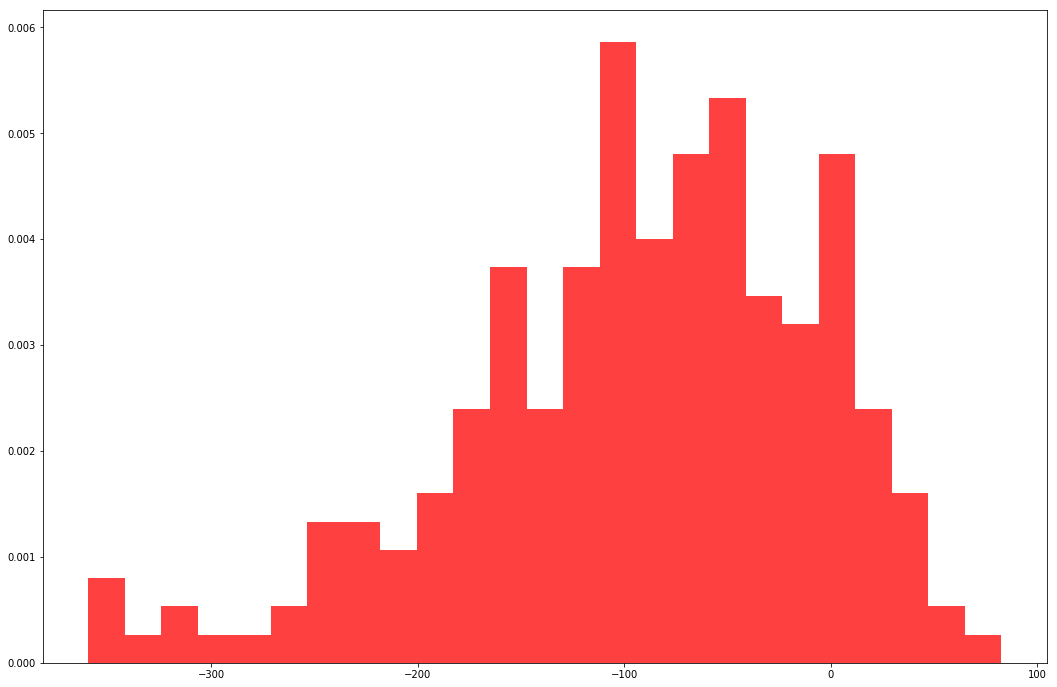

In [165]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_false_positive_scores, 25, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


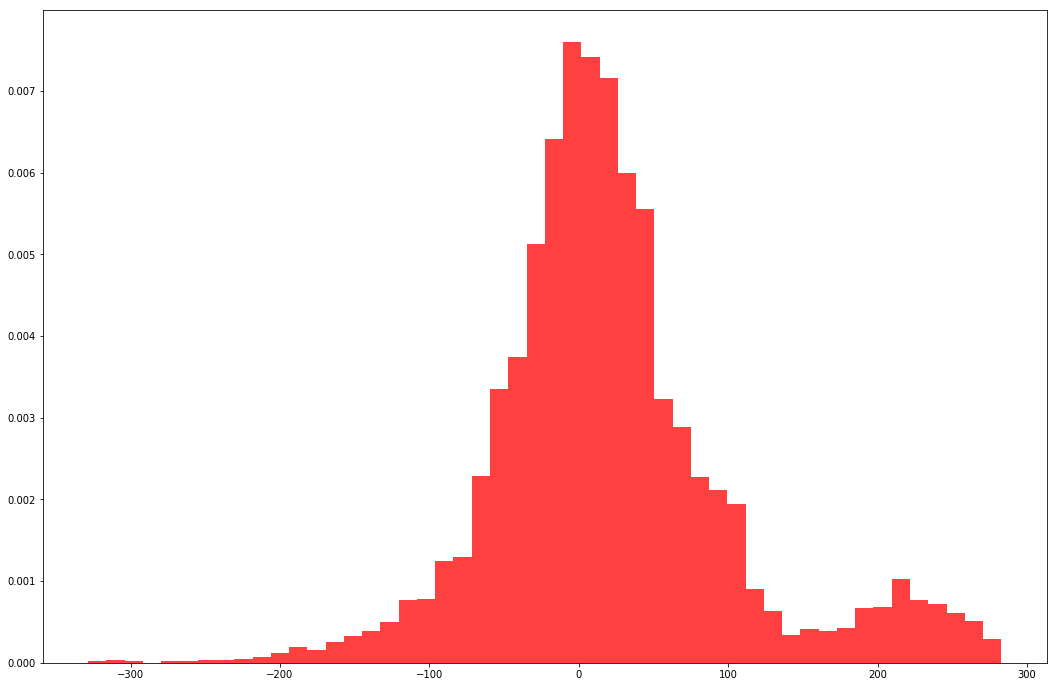

In [166]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_true_positive_scores, 50, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


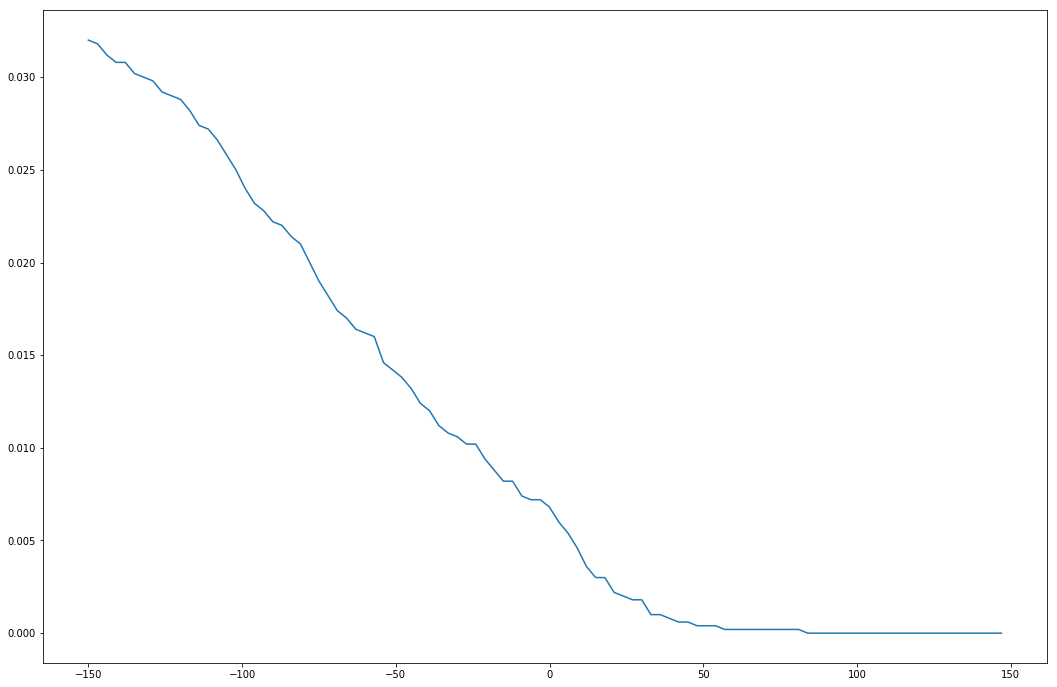

In [167]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_log_proba_threshold = -150.0
max_log_proba_threshold = 150.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_log_proba_threshold = min_log_proba_threshold + float(i)*(float(max_log_proba_threshold - min_log_proba_threshold)/float(n_tests))
    test_validation_false_positive_rate1 = float(sum(1 for score in validation_false_positive_scores if score >= test_log_proba_threshold)) / float(validation_set.images.shape[0])
    X.append(test_log_proba_threshold)
    Y.append(test_validation_false_positive_rate1)
    

plt.plot(X, Y)
plt.show()

Populating the interactive namespace from numpy and matplotlib


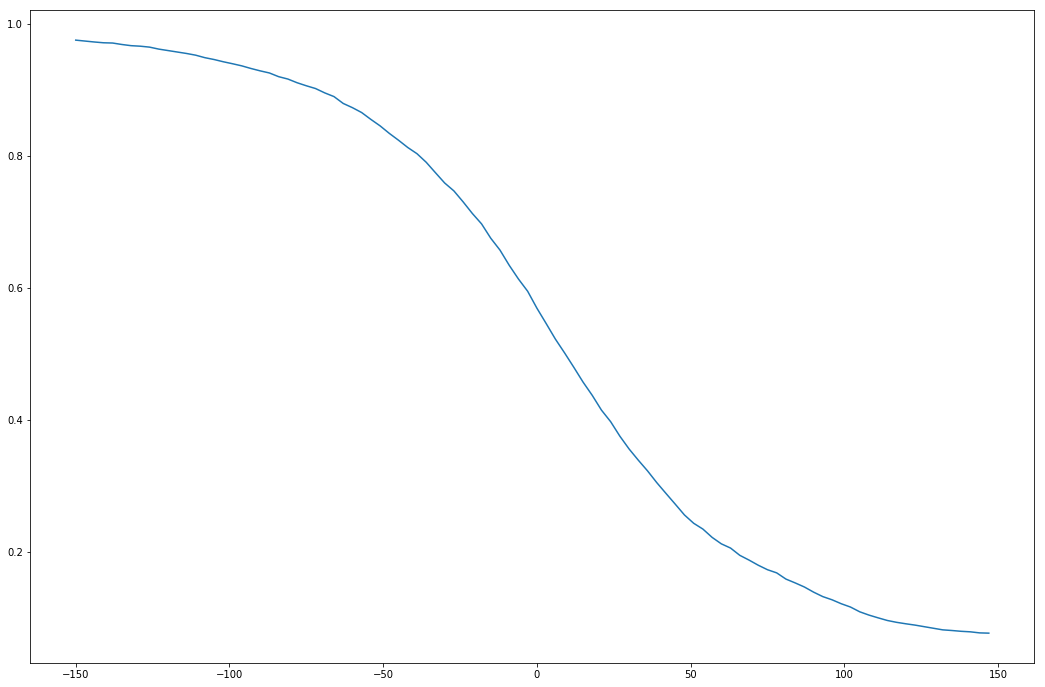

In [168]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_log_proba_threshold = -150.0
max_log_proba_threshold = 150.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_log_proba_threshold = min_log_proba_threshold + float(i)*(float(max_log_proba_threshold - min_log_proba_threshold)/float(n_tests))
    n_unclassified_validation_images1 = sum(1 for label, prediction, log_proba in validation_labels_predictions_log_probas if log_proba < test_log_proba_threshold)
    n_classified_validation_images1 = validation_set.images.shape[0] - n_unclassified_validation_images1
    
    n_classified_ratio = float(n_classified_validation_images1) / float(n_unclassified_validation_images1 + n_classified_validation_images1)
    
    X.append(test_log_proba_threshold)
    Y.append(n_classified_ratio)
    

plt.plot(X, Y)
plt.show()

In [169]:
log_proba_threshold = 50.0

In [170]:
validation_false_positive_rate1 = float(sum(1 for score in validation_false_positive_scores if score >= log_proba_threshold)) / float(validation_set.images.shape[0])
n_unclassified_validation_images1 = sum(1 for label, prediction, log_proba in validation_labels_predictions_log_probas if log_proba < test_log_proba_threshold)
n_classified_validation_images1 = validation_set.images.shape[0] - n_unclassified_validation_images1
n_classified_ratio = float(n_classified_validation_images1) / float(n_unclassified_validation_images1 + n_classified_validation_images1)

In [171]:
print(validation_false_positive_rate1)

0.0004


In [172]:
print(n_classified_ratio)

0.0764


In [173]:
n_unclassified_train_images1 = sum(1 for label, prediction, log_proba in train_labels_predictions_log_probas if log_proba < log_proba_threshold)
n_classified_train_images1 = train_set.images.shape[0] - n_unclassified_train_images1

n_unclassified_validation_images1 = sum(1 for label, prediction, log_proba in validation_labels_predictions_log_probas if log_proba < log_proba_threshold)
n_classified_validation_images1 = validation_set.images.shape[0] - n_unclassified_validation_images1

In [174]:
print(n_unclassified_train_images1)

36697


In [175]:
print(n_classified_train_images1)

18303


In [176]:
print(n_unclassified_validation_images1)

3763


In [177]:
print(n_classified_validation_images1)

1237


In [178]:
unclassified_train_set_images1 = np.zeros((n_unclassified_train_images1, 784))
unclassified_train_set_labels = []

k = 0
for i in range(0, train_set.images.shape[0]):
    if train_labels_predictions_log_probas[i][2] < log_proba_threshold:
        unclassified_train_set_images1[k, :] = train_set.images[i, :]
        unclassified_train_set_labels.append(train_set.labels[i])
        k += 1
        
        
unclassified_validation_set_images1 = np.zeros((n_unclassified_validation_images1, 784))
unclassified_validation_set_labels = []

k = 0
for i in range(0, validation_set.images.shape[0]):
    if validation_labels_predictions_log_probas[i][2] < log_proba_threshold:
        unclassified_validation_set_images1[k, :] = validation_set.images[i, :]
        unclassified_validation_set_labels.append(validation_set.labels[i])
        k += 1

In [179]:
pca2 = PCA(n_components=100)
pca2.fit(unclassified_train_set_images1)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [180]:
train_images_pca2 = pca2.transform(unclassified_train_set_images1)
validation_images_pca2 = pca2.transform(unclassified_validation_set_images1)

In [181]:
random_forest = RandomForestClassifier(n_estimators=40)
random_forest = random_forest.fit(train_images_pca2, unclassified_train_set_labels)

In [182]:
train_scores = random_forest.predict_proba(train_images_pca2)
validation_scores = random_forest.predict_proba(validation_images_pca2)

In [183]:
train_labels_predictions_probas = []
for i in range(0, train_images_pca2.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(train_scores[i][j])
    predicted_class = scores.index(max(scores))
    train_labels_predictions_probas.append([unclassified_train_set_labels[i], predicted_class, max(scores)])
    
    
validation_labels_predictions_probas = []
for i in range(0, validation_images_pca2.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(validation_scores[i][j])
    predicted_class = scores.index(max(scores))
    validation_labels_predictions_probas.append([unclassified_validation_set_labels[i], predicted_class, max(scores)])

In [184]:
train_false_positive_scores = []
train_true_positive_scores = []
for label, prediction, proba in train_labels_predictions_probas:
    if label != prediction:
        train_false_positive_scores.append(proba)
    else:
        train_true_positive_scores.append(proba)
train_false_positive_scores = sorted(train_false_positive_scores)
train_true_positive_scores = sorted(train_true_positive_scores)


validation_false_positive_scores = []
validation_true_positive_scores = []
for label, prediction, proba in validation_labels_predictions_probas:
    if label != prediction:
        validation_false_positive_scores.append(proba)
    else:
        validation_true_positive_scores.append(proba)
validation_false_positive_scores = sorted(validation_false_positive_scores)
validation_true_positive_scores = sorted(validation_true_positive_scores)

Populating the interactive namespace from numpy and matplotlib


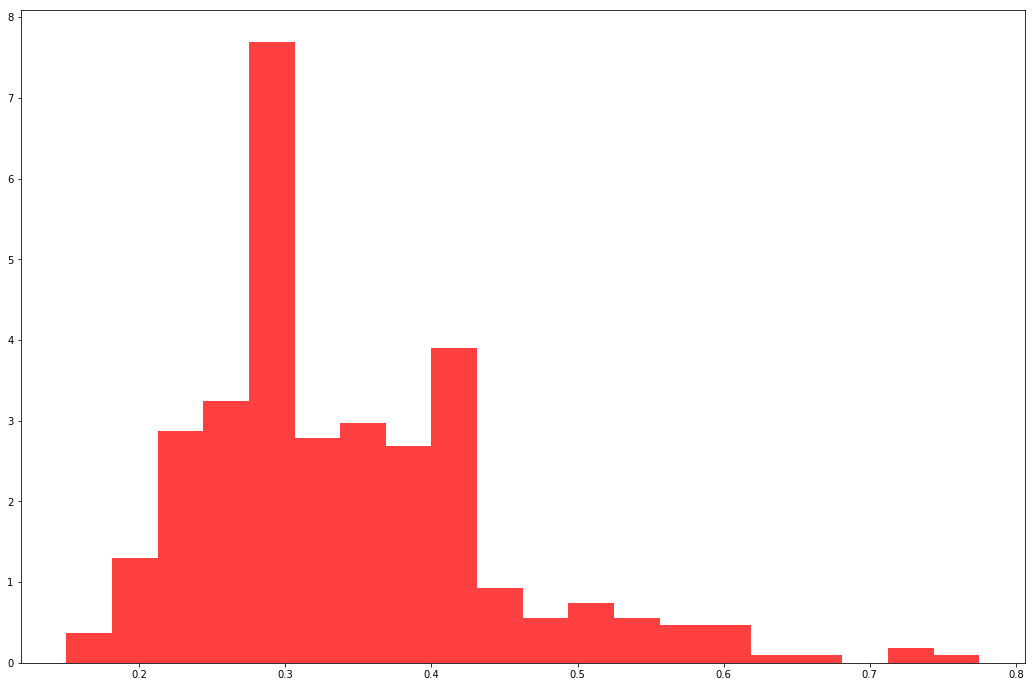

In [195]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_false_positive_scores, 20, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


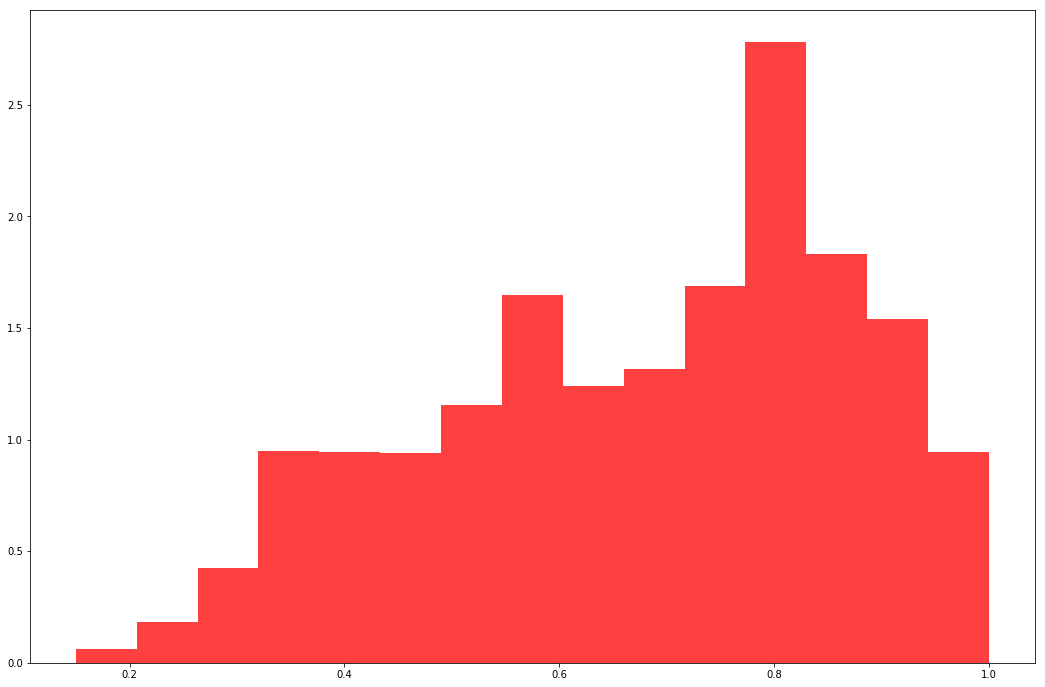

In [196]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(validation_true_positive_scores, 15, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


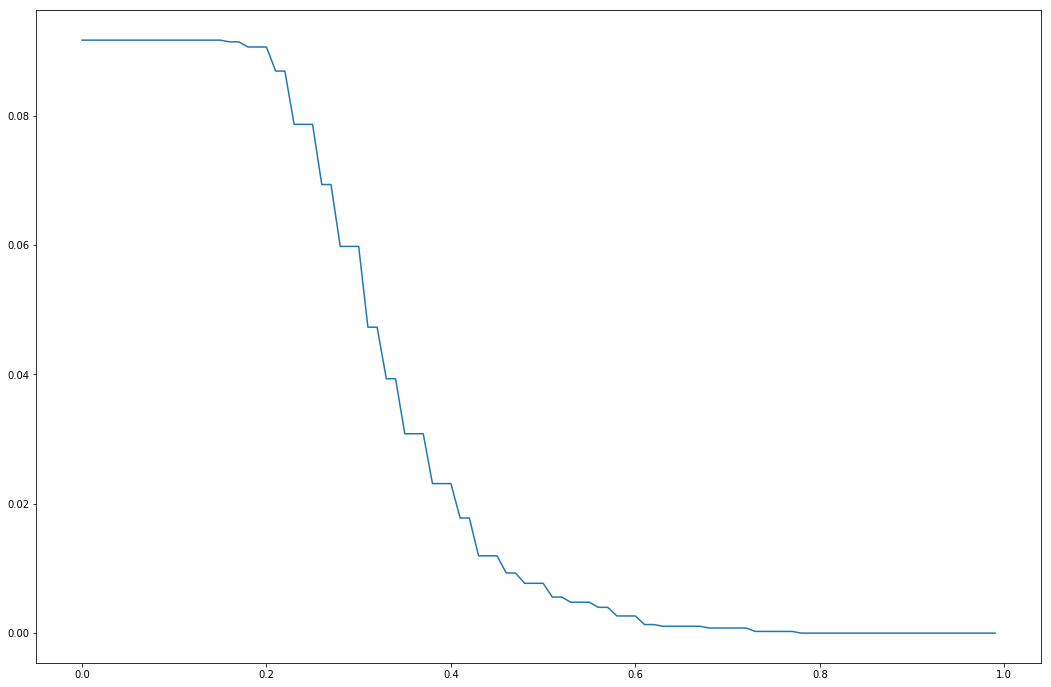

In [221]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_proba_threshold = 0.0
max_proba_threshold = 1.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_proba_threshold = min_proba_threshold + float(i)*(float(max_proba_threshold - min_proba_threshold)/float(n_tests))
    test_validation_false_positive_rate2 = float(sum(1 for score in validation_false_positive_scores if score >= test_proba_threshold)) / float(validation_images_pca2.shape[0])
    X.append(test_proba_threshold)
    Y.append(test_validation_false_positive_rate2)
    

plt.plot(X, Y)
plt.show()

Populating the interactive namespace from numpy and matplotlib


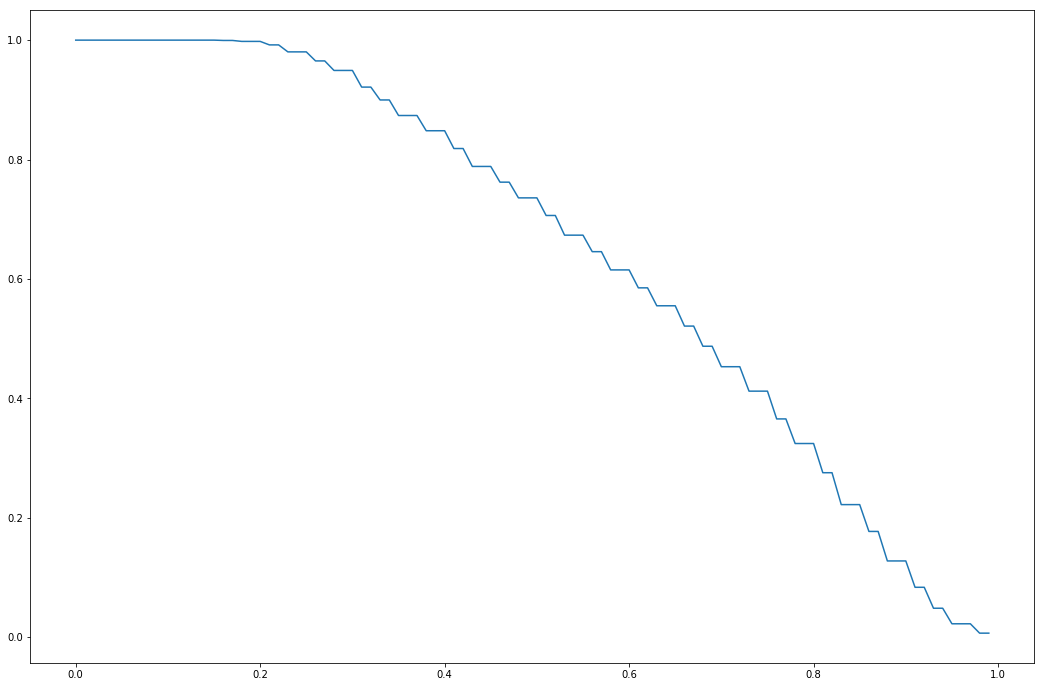

In [222]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_proba_threshold = 0.0
max_proba_threshold = 1.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_proba_threshold = min_proba_threshold + float(i)*(float(max_proba_threshold - min_proba_threshold)/float(n_tests))
    n_unclassified_validation_images2 = sum(1 for label, prediction, proba in validation_labels_predictions_probas if proba < test_proba_threshold)
    n_classified_validation_images2 = validation_images_pca2.shape[0] - n_unclassified_validation_images2
    
    n_classified_ratio = float(n_classified_validation_images2) / float(n_unclassified_validation_images2 + n_classified_validation_images2)
    
    X.append(test_proba_threshold)
    Y.append(n_classified_ratio)
    

plt.plot(X, Y)
plt.show()

In [223]:
proba_threshold = 0.7

In [224]:
validation_false_positive_rate2 = float(sum(1 for score in validation_false_positive_scores if score >= proba_threshold)) / float(validation_images_pca2.shape[0])

n_unclassified_validation_images2 = sum(1 for label, prediction, proba in validation_labels_predictions_probas if proba < proba_threshold)
n_classified_validation_images2 = validation_images_pca2.shape[0] - n_unclassified_validation_images2
n_classified_ratio = float(n_classified_validation_images2) / float(n_unclassified_validation_images2 + n_classified_validation_images2)

In [225]:
print(validation_false_positive_rate2)

0.0007972362476747276


In [226]:
print(n_classified_ratio)

0.4873770927451501


In [227]:
n_unclassified_train_images2 = sum(1 for label, prediction, proba in train_labels_predictions_probas if proba < proba_threshold)
n_classified_train_images2 = train_images_pca2.shape[0] - n_unclassified_train_images2

n_unclassified_validation_images2 = sum(1 for label, prediction, proba in validation_labels_predictions_probas if proba < proba_threshold)
n_classified_validation_images2 = validation_images_pca2.shape[0] - n_unclassified_validation_images2

In [228]:
print(n_unclassified_train_images1)

36697


In [229]:
print(n_classified_train_images1)

18303


In [230]:
print(n_unclassified_validation_images1)

1929


In [231]:
print(n_classified_validation_images1)

1834


In [ ]:
unclassified_train_set_images2 = np.zeros((n_unclassified_train_images2, 784))
unclassified_train_set_labels = []

k = 0
for i in range(0, train_set.images.shape[0]):
    if train_labels_predictions_log_probas[i][2] < log_proba_threshold:
        unclassified_train_set_images1[k, :] = train_set.images[i, :]
        unclassified_train_set_labels.append(train_set.labels[i])
        k += 1
        
        
unclassified_validation_set_images1 = np.zeros((n_unclassified_validation_images1, 784))
unclassified_validation_set_labels = []

k = 0
for i in range(0, validation_set.images.shape[0]):
    if validation_labels_predictions_log_probas[i][2] < log_proba_threshold:
        unclassified_validation_set_images1[k, :] = validation_set.images[i, :]
        unclassified_validation_set_labels.append(validation_set.labels[i])
        k += 1